LOOPR DATA SCIENCE ENGINEER ASSIGNMENT

VIT UNIVERSITY     
JOTHIKA.R   
21MDT0052    
jothika.r2031@gmail.com

---



IMAGE CLASSIFICATION 

In [ ]:
# importing the libraries and package for the image classfification
import numpy as np # used for  linear algebra and array
import pandas as pd # dataset set importing and data processing 
import seaborn as sns # used for visualization and graph plotting
import matplotlib.pyplot as plt # librabries used for  interative  visualization for  analysis
from sklearn.metrics import plot_confusion_matrix #used to show the matrix visualization 
import tensorflow as tf # it a library used for a image classification technique
from tensorflow import keras #used for building the machine learning model
from tensorflow.keras.layers import * #impoting the required library from the tensorflow and keras

# LOAD THE DATA SET FROM GOOGLE DRIVE

Separate the dataset into training and validation.                 

Total size of dataset : 651               
Training data set count : 521       
Validation dataset  count : 130


---



In [ ]:
#training Dataset
image_size = (48, 48)
batch = 32

train = keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/chess',
    validation_split=.2,
    subset='training',
    seed=42,
    image_size=image_size,
    batch_size=batch,
    label_mode='categorical'
)

Found 651 files belonging to 5 classes.
Using 521 files for training.


Validation dataset

In [ ]:
#validation dataset
validation = keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/chess',
    validation_split=.2,
    subset='validation',
    seed=42,
    image_size=image_size,
    batch_size=batch,
    label_mode='categorical'
)

Found 651 files belonging to 5 classes.
Using 130 files for validation.


# Data Extrtacting 

In [ ]:
#extracting the data after load the dataset to visualize the
#image according to the categories such as (queen, rook,bishop, pawn, knight)

def display_samples(dataset, n_samples, classes_name):
    plt.figure(figsize=(10, 10))
    for images, labels in dataset.take(1):
        for i in range(n_samples):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(classes_name[np.argmax(labels[i])])
            plt.axis("off")

(48, 48, 3)


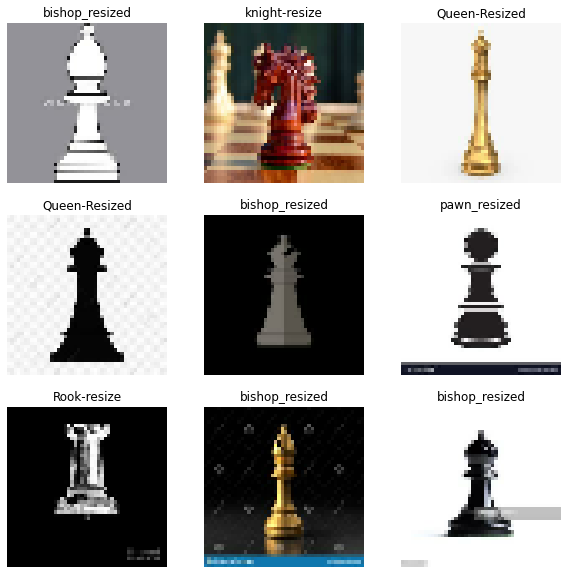

In [ ]:
#display the sample images from training dataset
display_samples(train, 9, train.class_names)
for images, labels in train.take(1):
        for i in range(1):
            print(images[i].shape)

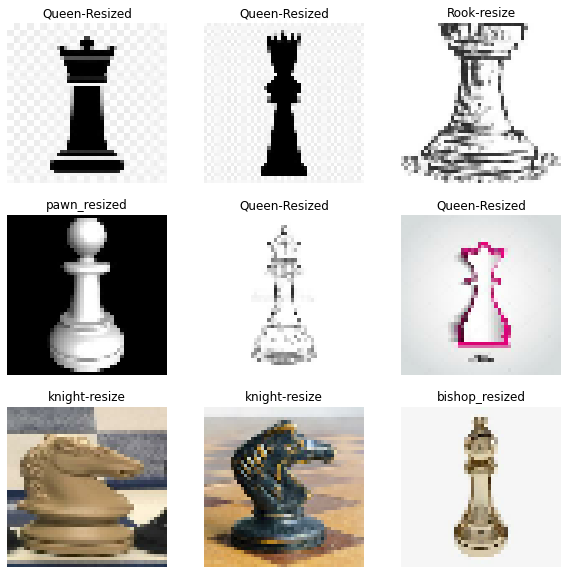

In [ ]:
#display the sample images from validation dataset
display_samples(validation, 9, validation.class_names)

# Data cleaning and Expolorative Data Analyzing

In [ ]:
#after extracting the data now analysing ans calculating the percentage of chess peices
class_names = train.class_names
labels = np.array([])
for _, label in train:
    labels = np.concatenate((labels, np.argmax(label, axis=-1)))
_, counts = np.unique(labels, return_counts=True)

In [ ]:
total = counts.sum()
print("The percentage each piece")
for i in range(len(counts)):
    print(f'{class_names[i]}: {counts[i]} (%{round(counts[i] / total * 100)})')

The percentage each piece
Queen-Resized: 88 (%17)
Rook-resize: 111 (%21)
bishop_resized: 118 (%23)
knight-resize: 133 (%26)
pawn_resized: 71 (%14)


# Machine learning model

In [27]:
input_shape = (image_size[0], image_size[1], 3)
reg = keras.regularizers.l2(0.0005)

model = keras.Sequential()
model.add(Conv2D(32, (3, 3), padding="same", activation="relu", input_shape=image_size + (3,), kernel_regularizer=reg))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding="same", activation="relu", kernel_regularizer=reg))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding="same", activation="relu", kernel_regularizer=reg))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(len(train.class_names), activation='softmax'))


model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 128)       

# EVALUATING THE DATA BY EPOCH

In [28]:
model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)
#You can increase the number of epochs to get a more accurate result with the data and reduce the loss
epochs = 40
model.fit(
    train,
    epochs=epochs,
    validation_data=validation
);

Epoch 1/40
17/17 [==============================] - 6s 241ms/step - loss: 2.3042 - accuracy: 0.1958 - val_loss: 3.4997 - val_accuracy: 0.2000
Epoch 2/40
17/17 [==============================] - 4s 218ms/step - loss: 1.9705 - accuracy: 0.1996 - val_loss: 2.3612 - val_accuracy: 0.1923
Epoch 3/40
17/17 [==============================] - 5s 276ms/step - loss: 1.8484 - accuracy: 0.2265 - val_loss: 1.9362 - val_accuracy: 0.2538
Epoch 4/40
17/17 [==============================] - 7s 378ms/step - loss: 1.7838 - accuracy: 0.2591 - val_loss: 1.7503 - val_accuracy: 0.2846
Epoch 5/40
17/17 [==============================] - 5s 261ms/step - loss: 1.8882 - accuracy: 0.2841 - val_loss: 2.5821 - val_accuracy: 0.3077
Epoch 6/40
17/17 [==============================] - 8s 419ms/step - loss: 1.6897 - accuracy: 0.3628 - val_loss: 1.7855 - val_accuracy: 0.3154
Epoch 7/40
17/17 [==============================] - 5s 278ms/step - loss: 1.6990 - accuracy: 0.2975 - val_loss: 1.8276 - val_accuracy: 0.3308
Epoch 

# Visualizing the accuracy graph for traning and validation data

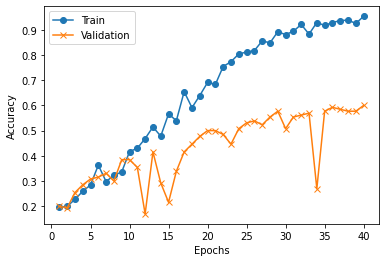

In [29]:
# visualising the Accuracy graph for training and validation data set
epochs_range = [i+1 for i in range(epochs)]
plt.plot(epochs_range, model.history.history['accuracy'], '-o', label='Train')
plt.plot(epochs_range, model.history.history['val_accuracy'], '-x',label='Validation')

plt.ylabel('Accuracy')
plt.xlabel('Epochs')

plt.legend();

In [16]:
y_pred = np.argmax(model.predict(validation), axis=-1)

predictions = np.array([])
labels =  np.array([])
for x, y in validation:
    predictions = np.concatenate([predictions, np.argmax(model.predict(x), axis=-1)])
    labels = np.concatenate([labels, np.argmax(y.numpy(), axis=-1)])

1/1 [==============================] - 0s 270ms/step


# Confusion matrix for analysis

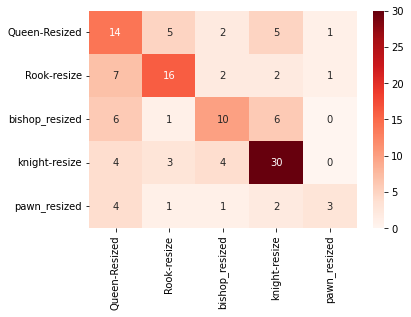

In [17]:
conf = tf.math.confusion_matrix(labels=labels, predictions=predictions)
sns.heatmap(conf, annot=True, cmap='Reds', yticklabels=class_names, xticklabels=class_names);

In [42]:
from tensorflow.keras.utils import load_img
from tensorflow.keras.preprocessing import image

# TESING THE IMAGE ACCURACY FROM IMPORTING THE IMAGE FILE

In [46]:

import numpy as np
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  path='/content/drive/MyDrive/chess/'+fn
  img = image.load_img(path,target_size =(48,48,3))
  x = image.img_to_array(img)
  x = x/225
  x =np.expand_dims(x,axis=0)
  images=np.vstack([x])
  classes = model.predict(images,batch_size=10)
  print(classes)

Saving images.jfif to images (8).jfif
1/1 [==============================] - 0s 112ms/step
[[0.28131518 0.08744691 0.06043998 0.34808722 0.22271071]]
